In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate the environment
np.random.seed(42)

n_arms = 10  # Number of slot machines
true_means = np.random.rand(n_arms)  # True (hidden) reward probabilities for each arm

print("True means (hidden):", np.round(true_means, 3))


True means (hidden): [0.375 0.951 0.732 0.599 0.156 0.156 0.058 0.866 0.601 0.708]


In [2]:
def epsilon_greedy_bandit(true_means, epsilon=0.1, steps=1000):
    n_arms = len(true_means)
    Q = np.zeros(n_arms)   # Estimated value of each arm
    N = np.zeros(n_arms)   # Number of times each arm was chosen
    rewards = []

    for t in range(steps):
        # Decide whether to explore or exploit
        if np.random.rand() < epsilon:
            action = np.random.randint(n_arms)  # Explore
        else:
            action = np.argmax(Q)  # Exploit

        # Generate reward from the chosen arm
        reward = np.random.rand() < true_means[action]

        # Update estimates (incremental average)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
        rewards.append(reward)

    return np.array(rewards), Q


In [3]:
rewards, Q = epsilon_greedy_bandit(true_means, epsilon=0.1, steps=1000)

print("Estimated means:", np.round(Q, 3))
print("Best arm chosen:", np.argmax(Q))
print("Total reward:", np.sum(rewards))


Estimated means: [0.462 0.945 0.923 0.636 0.143 0.091 0.125 0.895 0.5   0.692]
Best arm chosen: 1
Total reward: 903


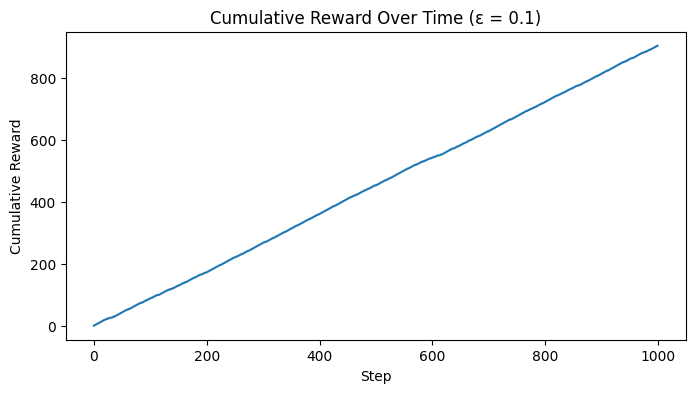

In [4]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(rewards))
plt.title("Cumulative Reward Over Time (ε = 0.1)")
plt.xlabel("Step")
plt.ylabel("Cumulative Reward")
plt.show()


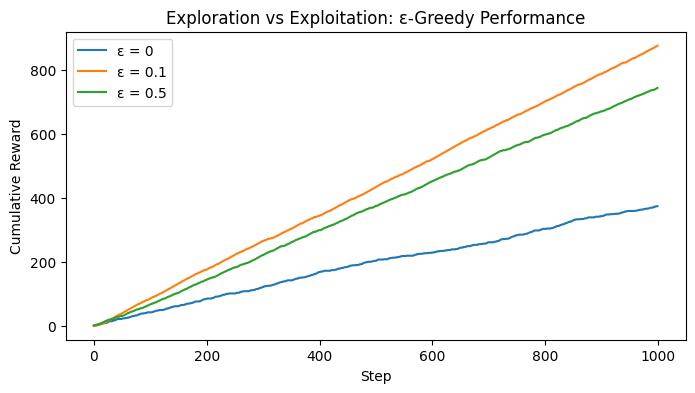

In [22]:
epsilons = [0, 0.1, 0.5]
steps = 1000
results = {}

for eps in epsilons:
    rewards, _ = epsilon_greedy_bandit(true_means, epsilon=eps, steps=steps)
    results[eps] = np.cumsum(rewards)

plt.figure(figsize=(8, 4))
for eps, rewards in results.items():
    plt.plot(rewards, label=f"ε = {eps}")
plt.legend()
plt.xlabel("Step")
plt.ylabel("Cumulative Reward")
plt.title("Exploration vs Exploitation: ε-Greedy Performance")
plt.show()
